In [139]:
import numpy as np
import matplotlib.pyplot as plt

def sign(x):
    if x >= 0:
        return 1
    else:
        return -1
    
def householder(w):
    v = np.zeros_like(w)

    v[0] = w[0] + sign(w[0]) * np.linalg.norm(w)
    v[1:] = w[1:]
    
    H = np.eye(len(w)) - 2 * np.outer(v, v) / np.dot(v, v)
    
    return H

def qrDecomposition(A):
    (rows, columns) = A.shape
    
    Q = np.identity(rows)
    R = np.copy(A)

    for column in range(columns):
        # get needed vector and apply householder transformation
        y = R[column:, column]
        Hk = householder(y)

        # fill up into correct matrix dimension
        Qk = np.identity(rows)
        Qk[column:,column:] = Hk

        # apply to matrices
        Q = Qk@Q
        R = Qk@R

    # cut into needed shapes
    R = R[0:columns,:] 
    Q = Q.T[:,0:columns]

    return Q, R

# Ax = b, solves for x
def linsolveQR(A, b):
    Q, R = qrDecomposition(A)

    # backward substitution
    # solve Rx = Q.T * b
    (rows, columns) = R.shape

    z = Q.T@b
    x = np.full(rows, 0, dtype=np.number)
    for row in reversed(range(rows)):
        sub = np.dot(R[row], x)
        x[row] = (z[row] - sub)/R[row, row]

    return x

In [140]:
# newton alogorythm
def newton(f, df, x, tol = 1e-14, maxStep = 100) :
    step = 0
    error = np.linalg.norm(f(x))
    while error > tol and step < maxStep:
        #print(step, x, error)
        x += linsolveQR(df(x), -f(x))
        error = np.linalg.norm(f(x))        
        step += 1
        
    return x

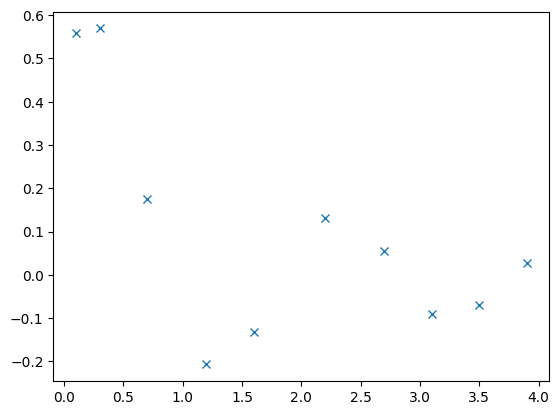

In [141]:
data = np.array([
    [0.1, 0.3, 0.7, 1.2, 1.6, 2.2, 2.7, 3.1, 3.5, 3.9],
    [0.558, 0.569, 0.176, -0.207, -0.133, 0.132, 0.055, -0.090, -0.069, 0.027]
]).T

t = data[:,0]
y = data[:,1]

plt.plot(t, y, "x")
plt.show()

[ -1.3761543    1.19732644 -10.24230569   0.55277389]


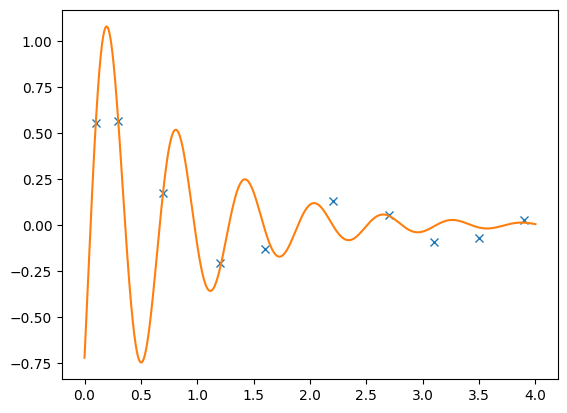

In [142]:
# model function
def yf(t, x):
    a, tau, omega, phi = x
    return a*np.exp(-tau*t)*np.sin(omega*t+phi)

def fitness_function(t, x, y): # function that needs to be optimized to zero
    return yf(t, x) - y

# model gradient
def fitness_function_jacobi(t, x):
    a, tau, omega, phi = x
    return np.array([np.exp(-tau*t)*np.sin(omega*t+phi),
                     -t*a*np.exp(-tau*t)*np.sin(omega*t+phi),
                     t*a*np.exp(-tau*t)*np.cos(omega*t+phi),
                     a*np.exp(-tau*t)*np.cos(omega*t+phi)]).T


def fit_parameters(t, y, x0):
    f = lambda x: fitness_function(t, x, y)
    df = lambda x: fitness_function_jacobi(t, x)

    p = newton(f, df, x0)
    return p

x = fit_parameters(t, y, x0=[1., 1., -1., 1.])
print(x)

t2 = np.linspace(0, 4, 1000)

plt.plot(t, y, "x")
plt.plot(t2, yf(t2, x))
plt.show()
